In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the California Housing dataset
# as_frame=True means sklearn will also prepare the dataset in pandas DataFrame format
housing = fetch_california_housing(as_frame=True)

# 'housing' is a Bunch object (like a dictionary with extra attributes)
# housing.data   -> features (X)
# housing.target -> target values (y)
# housing.frame  -> full pandas DataFrame with both features + target combined
df = housing.frame

# Show first 5 rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Generate descriptive statistics for numeric columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Display concise summary of the DataFrame
# like total rows, columns, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Show the shape (dimensions) of the DataFrame
# Output: (rows, columns)
df.shape

(20640, 9)

In [6]:
# Separate the input features (X) from the dataset
# .drop("MedHouseVal", axis=1) removes the target column (house value)
# axis=1 → means drop by column (axis=0 would mean drop by row)
# Result: 'x' contains only independent variables (features) like MedInc, HouseAge, etc.
x = df.drop("MedHouseVal", axis=1)

# Select the target column (dependent variable)
# 'y' will only contain the house prices (MedHouseVal) which we want to predict
y = df["MedHouseVal"]

In [7]:
# Split the dataset into training and testing sets
# train_test_split randomly divides data into 2 parts:
# - Training set: used to train the model (learn patterns)
# - Testing set: used to evaluate the model (check accuracy on unseen data)
# Parameters:
#   x, y         -> features and target
#   test_size=0.2 -> 20% data will go to testing, 80% to training
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=45
)
# random_state=45 → fixes the randomness of data splitting
# This ensures that every time you run the code, the train/test sets are the same.
# Helpful for reproducibility: you and others will always get identical results.

In [8]:
# Check the shape (rows, columns) of the training and testing sets
# x_train -> 80% of rows, features only
# x_test  -> 20% of rows, features only
print(x_train.shape)
print(x_test.shape)

(16512, 8)
(4128, 8)


In [9]:
# Create a Linear Regression model object
model = LinearRegression()

# Train (fit) the model using training data (x_train → input features, y_train → target/output)
# Behind the scenes: it learns the best coefficients (slopes/weights) and intercept (bias)
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Use the trained model to make predictions on unseen test data (x_test)
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) between actual values (y_test) and predicted values (y_pred)
# MSE = average of squared differences → tells us how far predictions are from real values
# tells how wrong predictions are (error measure).
mse = mean_squared_error(y_test, y_pred)

# Calculate the R² Score (Coefficient of Determination) -->  measures how well the model 
# R² shows how well the model explains the variance in the data (closer to 1 = better)
r2 = r2_score(y_test,y_pred)

# Print the evaluation results
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.5209452603172999
R2:  0.6074054352929972


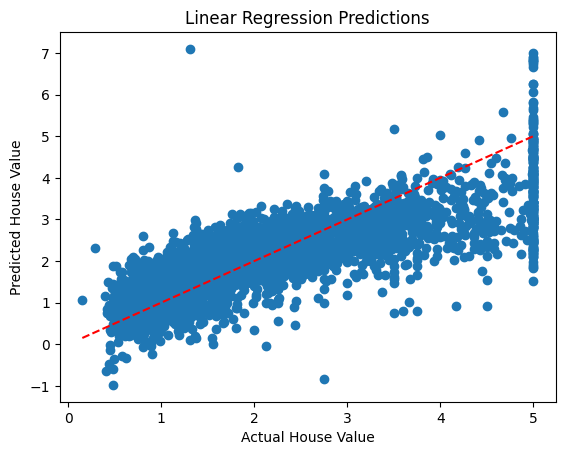

In [11]:
# Plot results
plt.scatter(y_test,y_pred)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression Predictions")

plt.plot([y.min(), y.max()],[y.min(), y.max()], color="red", linestyle="--")